# **TUGAS 7**

Materi:
- Least Squares
- Least Squares Data Fitting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Least Squares**
---
Buat quadratical equation yang cocok untuk mem-fit kan data-data berikut:
$(1, 10), (2.5, 7.5), (3, 2), (4, -1.5)$ menggunakan *least square*

---
**Soal 1**

- Quadratic equation akan berbentuk $\hat{f}(t) = \theta_{1} + \theta_{2}.t + \theta_{3}.t^2$
- Buat vandermonde matriks (`A`) dari quadratic equation ini

In [2]:
# Jawab
x = np.array([1,2.5,3,4])
y = np.array([10,7.5,2,-1.5])
A = lambda x: np.column_stack([x**i for i in range(3)])

---
**Soal 2**

- Apabila $\theta = (\theta_1, \theta_2, \theta_3)$. Cari nilai $\theta$

In [3]:
# Jawab
model_fit = lambda x, y: np.linalg.inv(A(x).T @ A(x)) @ A(x).T @ y
theta = model_fit(x,y)
theta

array([11.02      , -0.02666667, -0.8       ])

---
**Soal 3**

- Cari RMSE antara y prediksi dan y aktual

In [4]:
# Jawab
model_eval = lambda x, theta: A(x) @ theta
y_test = model_eval(x, theta)
rmse_func = lambda y_pred, y_act: np.linalg.norm(y_pred-y_act)/((len(y_act)**0.5))
rmse = rmse_func(model_eval(x, theta), y)
print(f'RMSE = {rmse:.2f}')

RMSE = 1.18


# **Benetton Sales**
---
- Diberikan data Sales dari Benetton (Perusahaan Clothing di Italia).
- Data terdiri dari `Year`: tahun saat itu, `Sales`: sales yang terjadi (dalam Juta Euro), dan `Advertising`: cost ads yang dikeluarkan (dalam Juta Euro)
- Anda diminta untuk mengestimasi nilai `Sales`

In [5]:
data = pd.read_csv('data_linalg_tugas07/benetton_sales.csv')
data

,year,sales,advertising
0,1,651,23
1,2,762,26
2,3,856,30
3,4,1063,34
4,5,1190,43
5,6,1298,48
6,7,1421,52
7,8,1440,57
8,9,1518,58


- Anda ingin mengestimasi sales menggunakan data advertising
- Anda buat fungsi berikut $\text{sales} = a + b\times\text{ads}$
- Anda akan selesaikan ini dengan analisis *least squares*

---
**Soal 4**

- Buat matriks vandermonde $A$

In [6]:
# Jawab
n = len(data)
A = np.column_stack((np.ones(n), data['advertising']))

---
**Soal 5**

- Cari nilai dari $a$ dan $b$

In [7]:
# Jawab
x = np.linalg.inv(A.T @ A) @ A.T @ data['sales']
a = x[0]
b = x[1]
print(f'a = {a:.2f}')
print(f'b = {b:.2f}')

a = 167.68
b = 23.42


---
**Soal 6**

- Carilah RMSE dari model ini

In [8]:
# Jawab
rmse = np.linalg.norm(data['sales'] - A@x)/(n**0.5)
print(f'RMSE = {rmse:.2f}')

RMSE = 45.71


# **Benetton Sales - Estimasi lain**
---
- Sekarang Anda ingin mengestimasi nilai `sales` dengan cara lain
- Persamaan yang Anda buat adalah $\text{sales} = a + b\times\text{ads} + c\times\text{year}$ (melakukan multi-linear regression)

---
**Soal 7**

- Buatlah matriks vandermonde $A$ dari model ini

In [9]:
# Jawab
A = np.column_stack([np.ones(n), data['advertising'], data['year']])

---
**Soal 8**

- Cari nilai $a$, $b$, dan $c$

In [10]:
# Jawab
x = np.linalg.inv(A.T @ A) @ A.T @ data['sales']
a = x[0]
b = x[1]
c = x[2]
print(a,b,c)

323.5374178503887 13.989612041550465 46.60038159848554


---
**Soal 9**

- Carilah RMSE model ini

In [11]:
# Jawab
rmse = np.linalg.norm(data['sales'] - A@x)/(n**0.5)
print(f'RMSE = {rmse:.2f}')

RMSE = 42.72


---
**Soal 10**

- Apa pendapat Anda mengenai 2 model di atas?
- Model mana yang Anda pilih?

In [12]:
# Jawab
pendapat = """
              1. Model 2 memberikan RMSE yang lebih kecil daripada model 1, dalam artian model 2
              dapat memodelkan data lebih baik
              2. Akan tetapi harus dilihat dulu apa pengaruh variabel tahun terhadap sales.
                  a. Jika dilihat, dengan kenaikan tahun memang terlihat ada penambahan budget
                  advertising. Hal ini mungkin keputusan yang diambil secara sadar oleh perusahaan
                  b. Akan tetapi, nilai tahun pada data (1,2, dst) sebenarnya tidak memberikan
                  arti terhadap sales yang dihasilkan perusahaan, sehingga hal ini malah akan
                  menimbulkan bias (sales naik karena advertising naik, advertising naik karena
                  secara sadar, perusahaan selalu meningkatkan budget advertising tiap tahun)
              3. Meskipun model 2 memberi error yang lebih rendah, namun perlu 
              dilihat apakah variabel yg digunakan untuk memprediksi memiliki arti 
           """        # silahkan isi pendapat terhadap kedua model dalam bentuk string

model_terbaik = 1  # isi dengan 1 atau 2

# **Data Electronic Sales Selama COVID**
---
- Pada beberapa minggu awal mewabahnya COVID 19, terjadi perubahan kondisi sales pada suatu toko
- Berikut adalah data sales antara pembelian `online` dan `in-stores`

In [13]:
data = pd.read_csv('data_linalg_tugas07/electronic_sales.csv')
data.head(5)

,week,online sales,in-store sales
0,1,100,97
1,2,107,99
2,3,103,104
3,4,90,100
4,5,90,99


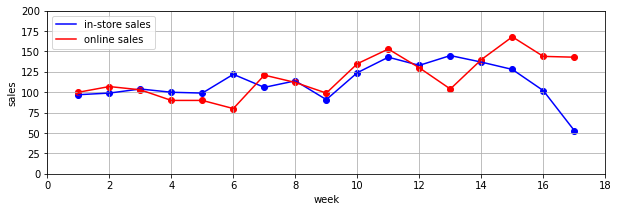

In [14]:
fig = plt.figure(figsize=(10,3))
plt.scatter(data['week'], data['in-store sales'], c='b')
plt.scatter(data['week'], data['online sales'], c='r')
plt.plot(data['week'], data['in-store sales'], 'b', label='in-store sales')
plt.plot(data['week'], data['online sales'], 'r', label='online sales')

plt.xlabel('week')
plt.ylabel('sales')
plt.xlim([0, 18])
plt.ylim([0, 200])
plt.grid(which='both')
plt.legend()
plt.show()

- **Online sales** terlihat menjanjikan
- Tapi pada 2 minggu terakhir, nilai online sales *flat*
- Anda diminta untuk membuat model untuk mengestimasi online sales pada minggu selanjutnya

---

- Melihat hal tersebut, Anda mengatur strategi pemodelan
- Anda mencoba membuat model konstan hingga polinom: $\hat{f} = \theta_{1} + \theta_{2}.X + ... + \theta_{p}.X^{p-1}$
- Untuk memastikan performa model, Anda membandingkan RMSE pada training & test data set

---
**Soal 11**

- Langkah pertama, Anda membuat pembagian antara data Training & Test
- Data training diambil dari data minggu ke-3 hingga 15
- Data sisa adalah data test
- Buatlah pembagian data tersebut

In [15]:
# Data initial
X = data['week']
y = data['online sales']

# Data yang telah di split
train = range(2,15)
X_train = X[train]
y_train = y[train]
X_test = np.concatenate((X[0:2],X[15:17]))
y_test = np.concatenate((y[0:2],y[15:17]))

---
**Soal 12**

- Buat lambda function untuk men-generate matriks vandermonde
- Input adalah nilai x dan p (degrees polinom + 1)
- p = 1 -> fungsi konstan
- p = 2 -> fungsi linear
- dst

In [16]:
# Jawab
vandermonde = lambda x,p: np.column_stack([x**i for i in range(p)])

---
**Soal 13**

- Lengkapi fungsi berikut untuk melakukan iterasi.
- Tentukan degrees maksimum dalam iterasi.
- Dan Jalankan Programnya untuk menjawab soal nomor berikutnya.

In [17]:
# Jawab
def polyLS(X_train, y_train, X_test, y_test, p):
    """
      Input:
        X_train, y_train    : training data
        X_test, y_test      : test data
        p                   : degree polynom

      Output:
        error_train         : list menyimpan rmse model dari train data
        error_test          : list menyimpan rmse model dari test data
        theta               : list menyimpan theta ditiap degree polynom dari 1-p
    """
    
    # error
    error_train = np.zeros(p)
    error_test = np.zeros(p)
    
    for p_ in range(1,p+1):
        A = vandermonde(X_train,p_)
        theta = np.linalg.inv(A.T @ A) @ A.T @ y_train
        error_train[p_-1] = np.linalg.norm(A @ theta - y_train)/(len(y_train)**0.5)
        error_test[p_-1] = np.linalg.norm(vandermonde(X_test,p_)@theta - y_test)/(len(y_test)**0.5)
    
    return (error_train, error_test, theta)

In [18]:
p = 6
a = polyLS(X_train, y_train, X_test, y_test, p)
a

(array([25.53243673, 16.85198604, 16.57258984, 16.54324966, 13.62742656,
        12.74264478]),
 array([ 21.08541379,  19.59072349,  19.35233932,  13.78126912,
        120.67559011, 179.75392107]),
 array([ 7.11888157e+00,  1.10277149e+02, -4.34629782e+01,  7.13301282e+00,
        -5.05553270e-01,  1.29147813e-02]))

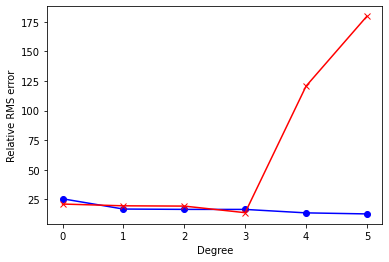

In [19]:
plt.plot(np.arange(p), a[0], 'b-o', label = 'Train')
plt.plot(np.arange(p), a[1], 'r-x', label = 'Test')
plt.xlabel('Degree')
plt.ylabel('Relative RMS error')
plt.legend
plt.show()

---
**Soal 14**

- Pilih degrees polinom dari model yang terbaik
- Simpan dalam variabel `theta_best`

In [32]:
# Jawab
best_degree = 2+1 # polinomial orde 2
A = vandermonde(X_train, p=best_degree)
theta_best = np.linalg.inv(A.T @ A) @ A.T @ y_train
np.round(theta_best, 2)

array([87.67,  0.69,  0.25])

---
**Soal 15**

- Menggunakan model ini, coba estimasi nilai sales yang terjadi dari awal hingga minggu 36
- Buat visualisasi data agar dapat dilihat dengan jelas

In [33]:
# Jawab
x = np.arange(1,37)
x_ = lambda x: np.column_stack([x**i for i in range(best_degree)])
model_eval = lambda x, theta: x_(x) @ theta
y_prediksi = model_eval(x,theta_best)
y_prediksi

array([ 88.60939061,  90.04195804,  91.96703297,  94.38461538,
        97.29470529, 100.6973027 , 104.59240759, 108.98001998,
       113.86013986, 119.23276723, 125.0979021 , 131.45554446,
       138.30569431, 145.64835165, 153.48351648, 161.81118881,
       170.63136863, 179.94405594, 189.74925075, 200.04695305,
       210.83716284, 222.11988012, 233.8951049 , 246.16283716,
       258.92307692, 272.17582418, 285.92107892, 300.15884116,
       314.88911089, 330.11188811, 345.82717283, 362.03496503,
       378.73526474, 395.92807193, 413.61338661, 431.79120879])

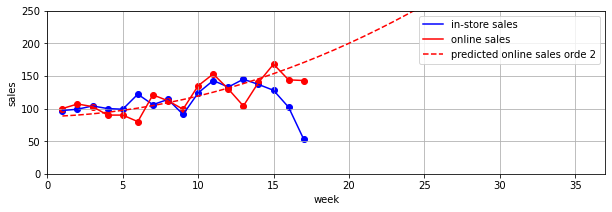

In [34]:
fig = plt.figure(figsize=(10,3))
plt.scatter(data['week'], data['in-store sales'], c='b')
plt.scatter(data['week'], data['online sales'], c='r')
plt.plot(data['week'], data['in-store sales'], 'b', label='in-store sales')
plt.plot(data['week'], data['online sales'], 'r', label='online sales')
plt.plot(x, y_prediksi, '--r', label='predicted online sales orde 2')

plt.xlabel('week')
plt.ylabel('sales')
plt.xlim([0, 37])
plt.ylim([0, 250])
plt.grid(which='both')
plt.legend()
plt.show()

---
**Soal 16**

- Tuliskan pendapatmu mengenai estimasi sales kedepannya
- Simpan dalam variabel `pendapat`

In [35]:
pendapat = """
              Estimasi sales kedepan dapat didekati dengan beberapa model polinomial.
              Pemilihan model umumnya mempertimbangkan selsih terkecil RMSE train dengan
              RMSE test. Dalam kasus ini polinomial orde-4
              Namun jika melihat tren yang dihasilkan, maka sulit untuk menjustifikasi
              bahwa polinomial orde-4  dapat memprediksi model online sales dengan baik
              karena cenderung terdapat overfitting
              Dengan melihat tren yang dihasilkan, model terbaik untuk memprediksi online sales
              adalah model polinomial orde-1 (linear) atau orde-2
           """